In [9]:
import numpy as np
import pandas as pd

In [10]:
from pycaret.nlp import *

In [11]:
train = pd.read_csv('sample_data_123.csv')

In [12]:
train.head()
#train.shape

,topic_link,date,user_id,user_rank,heading,reply_flag,topic_mark,body,views,found_helpful,image_flag,cateogry,normal_date
0,https://community.ebay.com/t5/Buying/Buying-Fr...,"May 15, 2020 10:31:19 PM",moldy5,Guide,Buying From Sellers with 90 Ship Time-DON'T Do...,0,NaN,"Hey Fellow Ebayers, the past month I watched 5...",17 Views,0,0,Buying,2020-05-15
1,https://community.ebay.com/t5/Getting-Started/...,"May 13, 2020 6:39:46 PM",guangxi_hone,Scout,"Earning badges. What ""earned by"" number means",0,NaN,"Under all of my badges I see ""earned by"" then ...",114 Views,0,0,Getting-Started,2020-05-13
2,https://community.ebay.com/t5/Selling/What-do-...,"May 15, 2020 9:25:24 AM",hotplatters,Adventurer,What do we do if the USPS closes or drasticall...,0,NaN,"As a seller on Ebay, I'm growing increasingly...",470 Views,1,0,Selling,2020-05-15
3,https://community.ebay.com/t5/Toys-Hobbies/HO-...,"May 15, 2020 7:07:51 AM",articulatedgeared01,Thrill-Seeker,HO Trains - Repair of Crown Gears on Mantua St...,0,NaN,Fri 5-15-2020 7:30 a.m. Mantua steam locomotiv...,49 Views,0,0,Toys-Hobbies,2020-05-15
4,https://community.ebay.com/t5/My-Account/My-re...,"May 15, 2020 11:32:01 PM",skakay0,Adventurer,My reviews are not posted after waiting the week,0,NaN,Hi I carefully ordered 8 wall. chargers for my...,5 Views,0,0,My-Account,2020-05-15


In [13]:
exp_nlp101 = setup(data = train, target = 'body', session_id = 123)

Description,Value
session_id,123
# Documents,2744
Vocab Size,5463
Custom Stopwords,False


In [15]:
text_list = list(train['body'])
type(text_list)

list

In [16]:
exp_nlp101_list = setup(data = text_list, session_id = 123)

Description,Value
session_id,123
# Documents,2744
Vocab Size,5463
Custom Stopwords,False


In [35]:
lda2 = create_model('lda', num_topics = 10, multi_core = True)

In [36]:
lda_results = assign_model(lda2)
lda_results.head()

,en,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Dominant_Topic,Perc_Dominant_Topic
0,fellow ebayer month watch item buy day ago dro...,0.175021,0.001335,0.001334,0.001335,0.174932,0.001334,0.063226,0.001334,0.147091,0.433058,Topic 9,0.43
1,badge see earn number could find mean wonder t...,0.009093,0.009093,0.009093,0.009094,0.009094,0.521250,0.009096,0.009094,0.405996,0.009096,Topic 5,0.52
2,seller grow increasingly concerned future usp ...,0.217546,0.002573,0.002573,0.002573,0.002573,0.087346,0.002573,0.002573,0.348689,0.330981,Topic 8,0.35
3,steam locomotive fit nylon nylon time tooth cr...,0.000344,0.000344,0.996906,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,0.000344,Topic 2,1.00
4,carefully order wall charger tablet receive pa...,0.593594,0.004552,0.004551,0.004551,0.004552,0.004551,0.004553,0.004552,0.004553,0.369991,Topic 0,0.59


In [37]:
evaluate_model(lda2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [38]:
plot_model(lda2, plot = 'topic_distribution')

In [39]:
plot_model(lda2, plot = 'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.221428  0.094470       1        1  28.198421
0      0.005571  0.092775       2        1  18.439569
8     -0.128434  0.179215       3        1  13.348935
6      0.068399 -0.047545       4        1  11.301708
3      0.263592 -0.075855       5        1   6.768196
1      0.240809  0.144308       6        1   6.716501
4      0.064437  0.282184       7        1   4.753687
5      0.078686 -0.259817       8        1   3.779452
7     -0.221530 -0.109154       9        1   3.656095
2     -0.150103 -0.300581      10        1   3.037441, topic_info=         Term         Freq        Total Category  logprob  loglift
430    return   805.000000   805.000000  Default  30.0000  30.0000
74        fee   512.000000   512.000000  Default  29.0000  29.0000
43     refund   606.000000   606.000000  Default  28.0000  28.0000
25       item  1410.000000  1410.000000  Default  27.0000  27.0000
67      buyer  1279.000000  1279.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1038  support    10.430719    47.995155  Topic10  -5.5106   1.9678
208    remove    11.965787   106.423233  Topic10  -5.3733   1.3088
270    update    11.642352   124.552879  Topic10  -5.4007   1.1241
167      make    13.791144   519.382812  Topic10  -5.2314  -0.1345
147        go    14.052670   746.482117  Topic10  -5.2126  -0.4784

[715 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
298       1  0.432586  able
298       2  0.118517  able
298       3  0.029629  able
298       4  0.237033  able
298       6  0.005926  able
...     ...       ...   ...
59        4  0.222710  year
59        5  0.026995  year
59        9  0.013498  year
4533      6  0.866779   zip
2445      3  0.893665    ðy

[1647 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 9, 7, 4, 2, 5, 6, 8, 3])

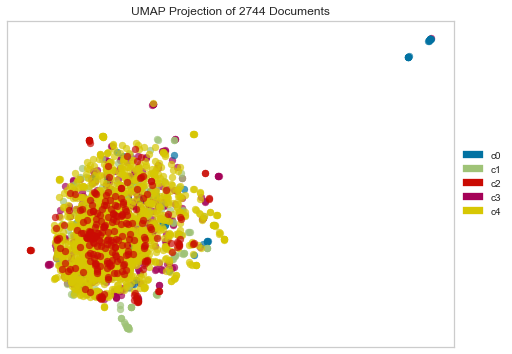

In [41]:
plot_model(lda2, plot = 'umap')

In [43]:
plot_model(lda2, plot = 'tsne')